In [1]:
import pathlib

import vocalpy as voc

In [2]:
test_data_dir = pathlib.Path(
    '/home/pimienta/Documents/data/vocal/goffinet'
)
wav_dir = test_data_dir / 'BM003'

In [4]:
wav_paths = voc.paths.from_dir(wav_dir, ext='wav')

In [5]:
segs_dir = test_data_dir / 'segs'

In [4]:
audio = voc.Audio.read(
    '/home/pimienta/Documents/data/vocal/goffinet/BM003/BM003_day9_air_20s_sparse_chunk002_1030.wav'
)

In [5]:
spect_params = {
    'min_freq': 30000.0,
    'max_freq': 110000.0,
    'nperseg': 1024,
    'noverlap': 512,
    'spect_min_val': -10.0,
    'spect_max_val': 2.0,
    'transform': 'log_magnitude',
}

In [8]:
spect, f, t = voc.segment.ava.get_spectrogram(audio.data, audio.samplerate,
                                             **spect_params)

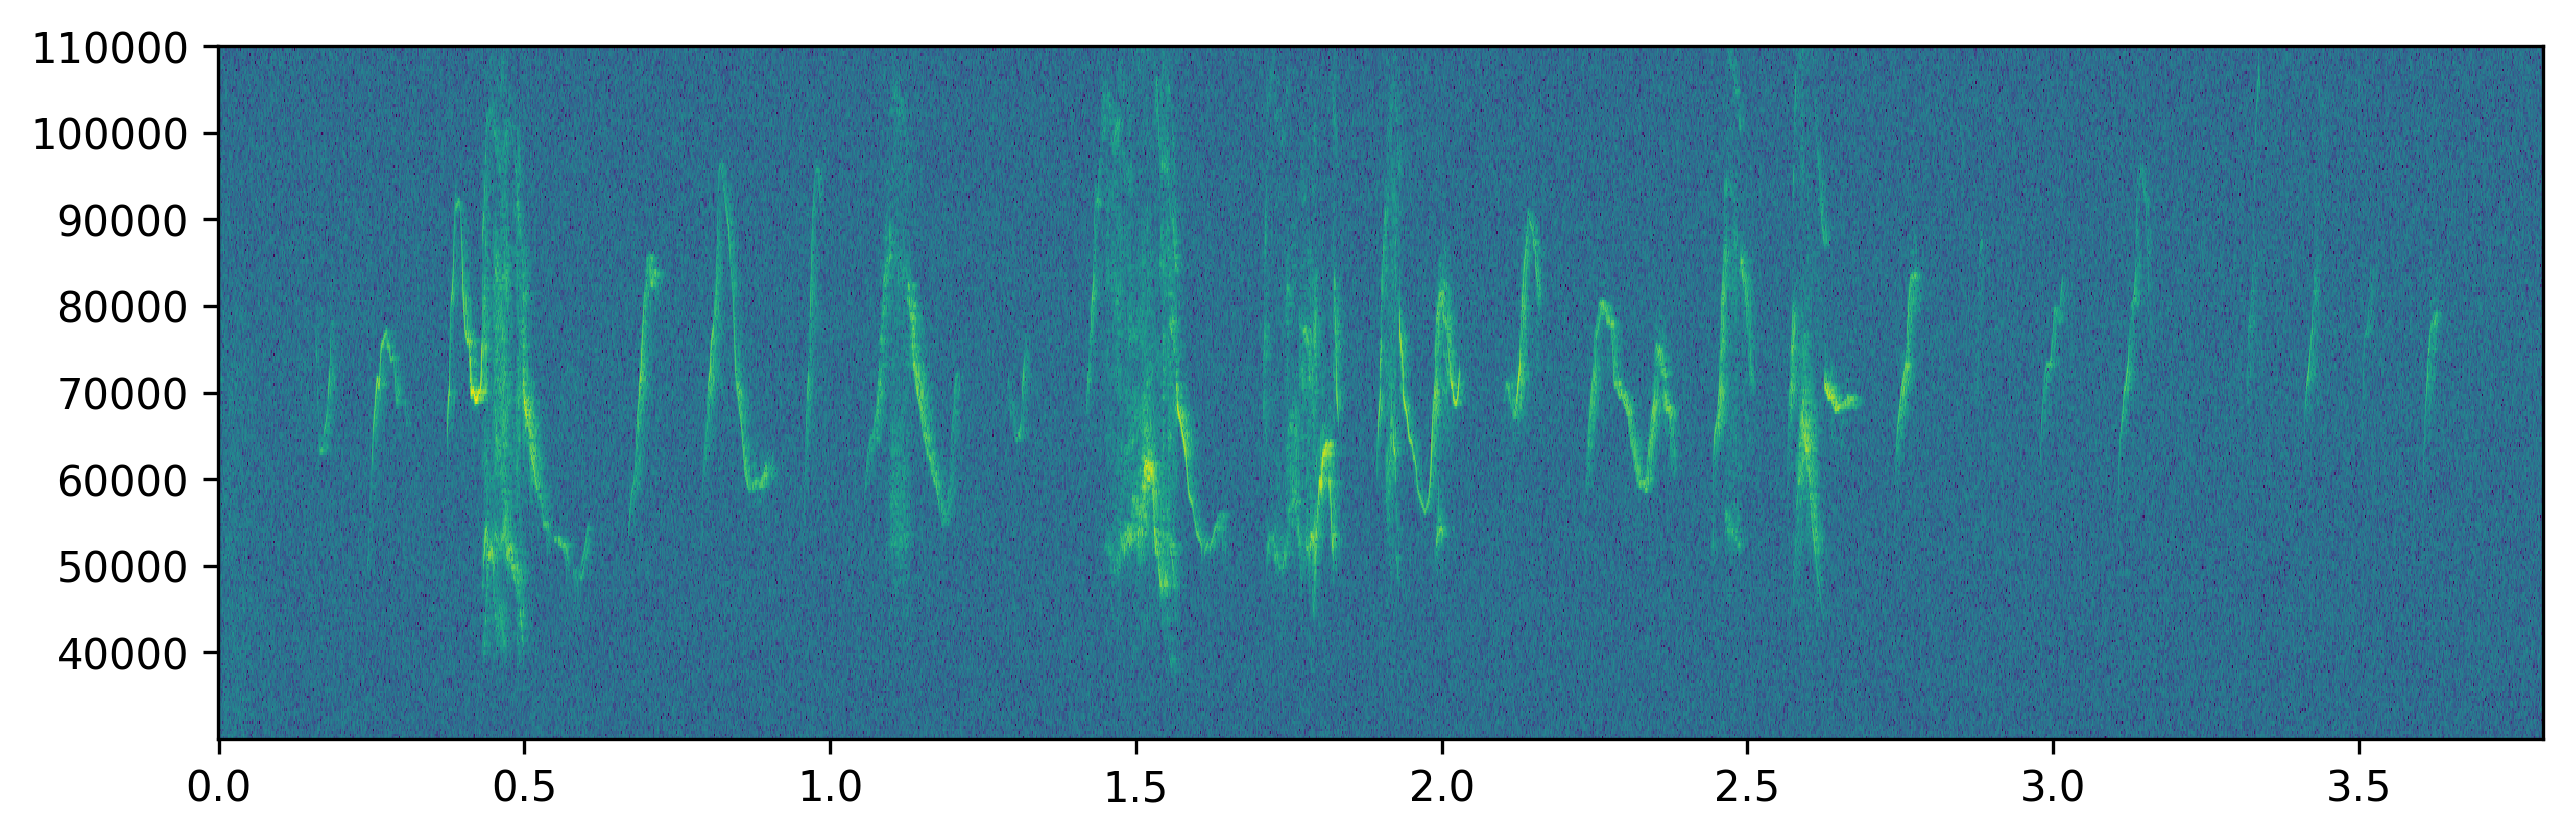

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
ax.pcolormesh(t, f, spect)

In [10]:
spect.min()

0.0

In [11]:
spect.max()

0.7953110438171566

In [12]:
amps = voc.segment.ava.softmax(spect, t=0.01)

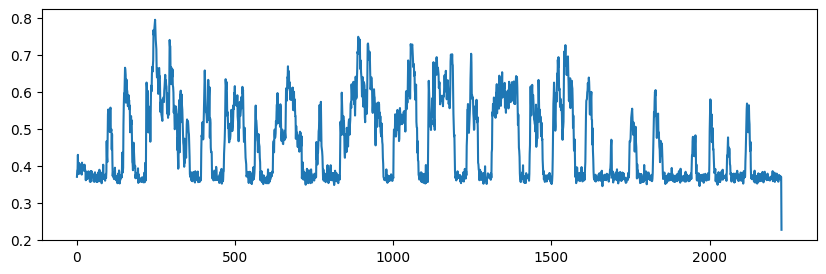

In [13]:
fig, ax = plt.subplots(figsize=(10,3))
plt.plot(amps)

In [14]:
dt = t[1] - t[0]
smoothing_timescale = 0.007
smoothed = voc.segment.ava.gaussian_filter(amps, smoothing_timescale / dt)

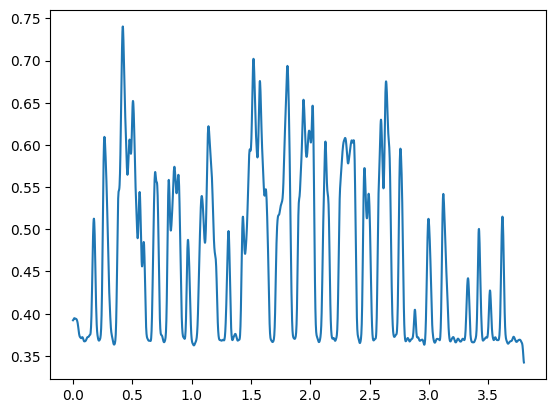

In [15]:
plt.plot(t, smoothed)

In [16]:
# Set value for th_1: [0.33] 0.32                                                                                                               
# Set value for th_2: [0.35] 0.34                                                                                                               
# Set value for th_3: [0.36]                                                                                                                    Set value for max_dur: [0.2]                                                                                                                  
# Set value for min_dur: [0.03]                                                                                                                 
# Set value for smoothing_timescale: [0.007]                                                                                                    
# Set value for temperature: [0.1]  

In [16]:
segment_params = {
    'thresh_max': 0.305,
    'thresh_min': 0.3,
    'thresh_lowest': 0.295,
    'min_dur': 0.03,
    'max_dur': 0.2,
    'smoothing_timescale': 0.007,
    'temperature': 0.5,
}

In [17]:
import functools

spect_callable = functools.partial(voc.segment.ava.get_spectrogram, **spect_params)

In [18]:
onsets, offsets = voc.segment.ava.segment(audio.data, audio.samplerate,
                                          spect_callback=spect_callable,
                                          **segment_params)

In [19]:
onsets

array([0.11264   , 0.22698667, 0.65706667, 0.77824   , 0.94037333,
       1.03936   , 1.27658667, 1.69301333, 1.86709333, 2.08213333,
       2.21696   , 2.42517333, 2.54464   , 2.70848   , 2.85354667,
       2.96789333, 3.09248   , 3.30069333, 3.39114667, 3.48842667,
       3.58912   ])

In [20]:
offsets

array([0.21333333, 0.33450667, 0.75776   , 0.94037333, 1.00010667,
       1.23221333, 1.34144   , 1.86709333, 2.06336   , 2.18794667,
       2.40810667, 2.52928   , 2.70848   , 2.79893333, 2.90304   ,
       3.03957333, 3.1744    , 3.35530667, 3.45258667, 3.54304   ,
       3.65056   ])

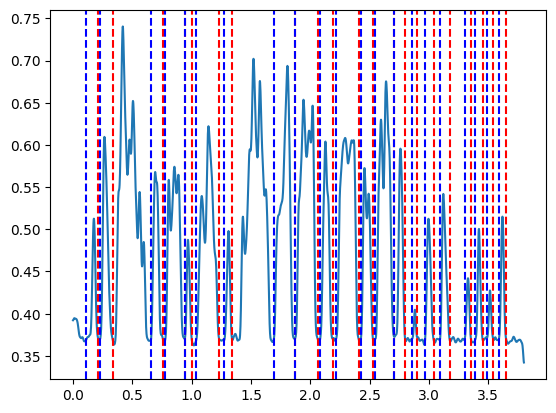

In [21]:
fig, ax = plt.subplots()

ax.plot(t, smoothed)

for onset, offset in zip(onsets, offsets):
    ax.axvline(onset, color='b', linestyle='--')
    ax.axvline(offset, color='r', linestyle='--')